### Algotimos genéticos

Para los ejemplos utilizaremos el problema del viajante de comercio (TSP)

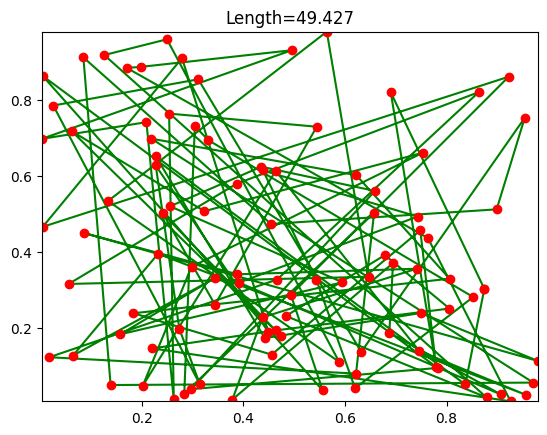

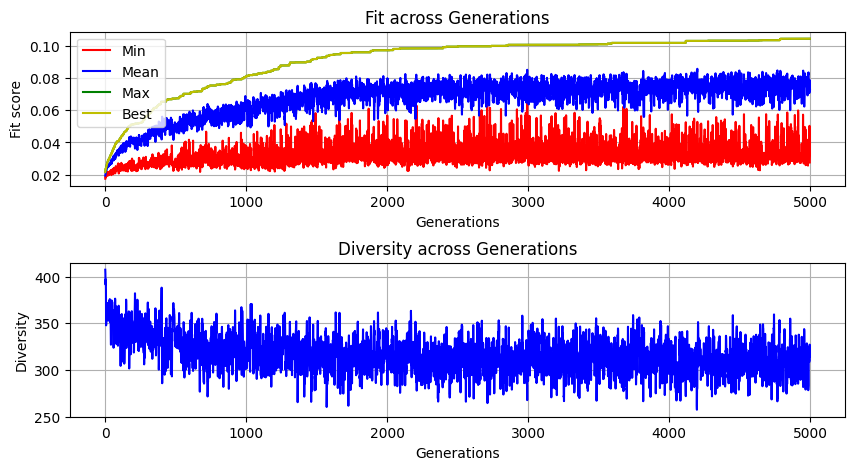

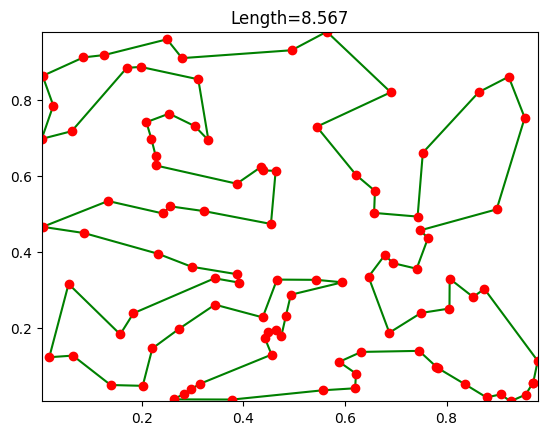

In [9]:
# definición del TSP

import random
import matplotlib.pyplot as plt
import numpy as np

def draw(solution):
	plt.ion()
	fig = plt.figure()
	axes = fig.add_subplot(111)
	circle = np.array(list(solution) + [solution[0]])
	min_v = np.min(circle, axis=0)
	max_v = np.max(circle, axis=0)
	xlim = axes.set_xlim(min_v[0], max_v[0])
	ylim = axes.set_ylim(min_v[1], max_v[1])
	l1, = axes.plot(circle[:, 0], circle[:, 1],'g')
	l2, = axes.plot(circle[:, 0], circle[:, 1],'ro')
	s = 'Length=%5.3f' % globaldist(circle)
	plt.title(s)

N = 10

# cities = []
# 
# for i in range(N):
# 	c = [random.random(), random.random()]
# 	cities.append(c)
# 
# print(cities)

cities = [[0.8744058793117488, 0.30207179832703746], [0.6901572276474558, 0.8203362566663311], [0.7793458478083026, 0.09728979746351918], [0.7483358474304422, 0.4563419482458657], [0.4556164527790729, 0.12863149772605698], [0.1837236688553453, 0.23773749495644914], [0.806151832654163, 0.3288366900529254], [0.6222702185205219, 0.6019431085670109], [0.21886861543988367, 0.6980104036528004], [0.9706096813038716, 0.054871876245520146], [0.13881496219356027, 0.048489530185603646], [0.08511086492841424, 0.9123075505436051], [0.45436952164297595, 0.4731540740573398], [0.8986352255038935, 0.5116579750591849], [0.9539248970461742, 0.7530784036308166], [0.6321102985156373, 0.13575967095580344], [0.31130918313591205, 0.8545457319320597], [0.025897479791937017, 0.7854526665590987], [0.31414095045738066, 0.051421702103483846], [0.2739561013272712, 0.1970964027924862], [0.22762328443470214, 0.627414210742153], [0.44920042912037383, 0.18835427573438068], [0.2793138301174244, 0.9103956650199608], [0.005128451667189338, 0.4655718085045638], [0.9222718335261915, 0.8613103704784812], [0.49352498279326595, 0.28652416807644077], [0.5560886356057152, 0.034564925228364185], [0.0048939219846825255, 0.8635350555457212], [0.7824462381771976, 0.09355415747424733], [0.2973635133076785, 0.037580527218207815], [0.659068210692151, 0.5602321147981546], [0.43549418718677035, 0.6241289474799954], [0.25580657871099755, 0.519726015381631], [0.5950780852425872, 0.3193476592023645], [0.15763623266223903, 0.18210618406479095], [0.3434173147566393, 0.32992255868483356], [0.06451313705472006, 0.12606114349173192], [0.23212286400737547, 0.3945559700824013], [0.955507285594692, 0.02296933408938162], [0.7459955912073274, 0.1385374827130177], [0.46365765315595475, 0.6132297411379687], [0.20196772698059162, 0.046358747430397584], [0.2980093518214506, 0.36041197123227897], [0.7533459401199348, 0.6610562232191091], [0.323433933838161, 0.5068337090138902], [0.062138830138457, 0.7177455044259695], [0.47467832142010535, 0.17692718986260936], [0.2415634321550142, 0.500852093941769], [0.3441878827094532, 0.2604351258948506], [0.5445252142594251, 0.7295590645635646], [0.25391391610860914, 0.7641244059389684], [0.2630560480211699, 0.010670642241309536], [0.2092202940037915, 0.7415775443241935], [0.0031474687633804566, 0.6974574785842637], [0.4952329615559806, 0.9311775894780175], [0.1978488658972426, 0.8872693649066419], [0.1705364411799497, 0.8846808176103278], [0.7634962513234275, 0.4358457309207533], [0.9259752834140167, 0.0056226911773098465], [0.22090405091557253, 0.14500040130773872], [0.4636205151855679, 0.19249574424477278], [0.8057632881682811, 0.250168118157608], [0.6785236695642043, 0.39119477830554505], [0.4837264739606879, 0.23045417711558214], [0.8786721718893166, 0.015853186240832207], [0.1263309724872509, 0.9185321014517236], [0.24969404380600335, 0.9600467657522086], [0.5886119367943214, 0.10948123668473264], [0.13373527735293878, 0.5336853876899833], [0.5642696742735989, 0.9801384844337597], [0.646401605512568, 0.3338636388089157], [0.05603526365085032, 0.3149530712641142], [0.387141492676661, 0.5792852545912592], [0.8634070619751958, 0.8206820685065667], [0.4662474858565825, 0.32647667516764145], [0.01801973379815025, 0.12175434785651695], [0.6218125565554127, 0.07860046445444713], [0.6573938922925594, 0.5023092428939168], [0.2837581848186974, 0.02576704782244421], [0.3044774374252185, 0.7310313422019327], [0.33131673439274434, 0.693896434962478], [0.8523694048117944, 0.2805224723356823], [0.6200019812032047, 0.03989814578273998], [0.5437394088109648, 0.3258031129949792], [0.4386079860370994, 0.6142798815693052], [0.7430581106897977, 0.49260737229959284], [0.3913628378102181, 0.3185830750836698], [0.9065498976196814, 0.02381958527497441], [0.6874236611131453, 0.18642068590773597], [0.6946411585627993, 0.36991609629423117], [0.3784063098306413, 0.01018756575849844], [0.43806374889930155, 0.2268325586117821], [0.7411632641820634, 0.35513151640087337], [0.3884706603234591, 0.34043302784114093], [0.08674110453583683, 0.4491174987265194], [0.9794883193315694, 0.11207520940235804], [0.7496156619797683, 0.23845386610980834], [0.4423888847621813, 0.17212722421686055], [0.2276570035864689, 0.6515924491551327], [0.836939257954547, 0.0499933914625984]] # Length=8.587

def dist (x, y): # distancia euclídea
	return ( (x[0]-y[0])**2 + (x[1]-y[1])**2 ) ** 0.5

def globaldist (cities): # calcula la ditancia global de una solución
	acum = 0.0
	for i in range(len(cities)):
		acum += dist(cities[i-1],cities[i]) # -1 is the last element
	return acum

def fit_cities (cities): # fitness para TSP
	return 1 / (1+globaldist(cities))

from src.evolutive import PermutationEvolutive, plot_evolution

draw(cities)
evolution = PermutationEvolutive(
    alphabet=cities,
    n_individuals=100,
    mutation=["to-opt", "insert-gene", "swap-gene"],
    crossover= "half-fixed",
	T_selection=10,
	p_crossover=0.7,
	elitism=True,
	use_multithread=False
)

results = evolution.evolve(fit=fit_cities, n_generations=5000)
plot_evolution(results["evolution_dict"])
draw(results["best"])

In [3]:
fit_cities(results["best"])

0.023369026916860373

In [1]:
# draw a TSP solution

import matplotlib.pyplot as plt
import numpy as np

def draw (solution):
    plt.ion()
    fig = plt.figure()
    axes = fig.add_subplot(111)
    xlim = axes.set_xlim(0.0,1.0)
    ylim = axes.set_ylim(0.0,1.0)
    x = []
    y = []

    bucle = solution + [solution[0]] # añade al final la vuelta a la primera

    c = np.array(bucle)
    x = c[:,0]
    y = c[:,1]

    l1, = axes.plot(x, y,'g')
    l2, = axes.plot(x, y,'ro')
    
    s = 'Length=%5.3f' % globaldist(bucle)
    plt.title(s)

draw(cities)

NameError: name 'cities' is not defined

Haremos una implementación funcional, aunque sería más apropiado definir una clase

In [ ]:
import random
import copy

def create (alphabet, N=100): # crea y devuelve población
    pop = []
    for _ in range(N):
        ind = [*alphabet]
        random.shuffle(ind)
        pop.append(ind)
    return pop

def sort_pop (pop, fit): # devuelve una tupla: la población ordenada por fitness, y la lista de fitness
    fitness_list = []
    for i, ind in enumerate(pop):
        fitness_list.append(fit(ind))
    

def select (pop, T): # devuelve un individuo seleccionado por torneo, devuelve una copia para evitar efectos laterales
    # pop se supone ya ordenada por fitness
    pass

def crossover (ind1, ind2, pcross): # devuelve el cruce (emparejamiento) de dos individuos
    pass

def mutate (ind, pmut): # devuelve individuo mutado; la mutación consistirá en intercambiar elementos
    pass

def evolve (pop, fit, pmut, pcross=0.7, ngen=100, T=2, trace=0, elitism=False):
    pass

In [13]:
# Prueba simple (ordenar una lista de 10 elementos)

alphabet = list(range(10))

pop = create(alphabet)
print(pop)

def fit (ind):
    # cuenta los mal colocados
    distance = 0
    for i in range(len(ind)):
        distance += abs(i-ind[i])
    return distance # mejor cuanto más colocados

_, pop = sort_pop(pop, fit)
print(pop)

for _ in range(3):
    ind = select(pop, 5)
    print(ind)

i2 = mutate(pop[0],0.5,10)
print(i2)

i1 = list(range(10))
i2 = list(reversed(i1))
i1, i2 = crossover(i1,i2,1.0)
print(i1,i2)


[[4, 6, 3, 1, 7, 5, 0, 9, 8, 2], [7, 8, 4, 3, 0, 1, 2, 6, 9, 5], [2, 6, 1, 4, 8, 3, 9, 5, 7, 0], [5, 6, 3, 2, 1, 7, 9, 8, 0, 4], [4, 2, 0, 8, 5, 3, 7, 9, 1, 6], [4, 7, 6, 5, 9, 0, 3, 2, 8, 1], [8, 3, 7, 6, 9, 5, 4, 0, 1, 2], [7, 2, 0, 9, 4, 1, 3, 6, 5, 8], [2, 7, 8, 3, 0, 5, 6, 4, 1, 9], [1, 9, 7, 3, 0, 5, 2, 8, 4, 6], [5, 4, 9, 1, 2, 0, 3, 8, 7, 6], [4, 0, 2, 9, 1, 6, 3, 8, 5, 7], [7, 3, 9, 6, 2, 4, 5, 0, 8, 1], [0, 3, 4, 5, 7, 1, 9, 8, 6, 2], [7, 4, 5, 9, 2, 1, 0, 8, 6, 3], [0, 4, 5, 7, 1, 2, 6, 3, 9, 8], [8, 6, 4, 3, 0, 1, 5, 9, 2, 7], [7, 3, 4, 2, 8, 9, 1, 0, 5, 6], [5, 9, 6, 7, 4, 0, 3, 1, 2, 8], [7, 8, 2, 0, 9, 3, 4, 5, 1, 6], [5, 3, 4, 1, 7, 8, 0, 2, 9, 6], [6, 4, 7, 2, 1, 0, 5, 9, 3, 8], [4, 0, 7, 8, 3, 1, 2, 5, 6, 9], [3, 6, 8, 1, 5, 7, 4, 9, 2, 0], [0, 9, 2, 4, 6, 5, 7, 3, 1, 8], [6, 3, 0, 4, 1, 5, 8, 9, 2, 7], [0, 2, 5, 8, 7, 9, 4, 6, 1, 3], [4, 9, 8, 1, 7, 0, 2, 6, 5, 3], [9, 4, 3, 7, 6, 2, 5, 8, 0, 1], [0, 4, 3, 9, 8, 5, 2, 1, 6, 7], [8, 9, 6, 5, 0, 3, 4, 2, 1, 7], [5, 6, 

In [16]:
pop = create(alphabet)
evolve(pop, fit, 1/10, pcross=0.7, ngen=100, T=8, maximize=False) # por qué T=8?



Fitness óptimo: 0.000
Mejor individuo [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [0, 1, 2,

### Vamos con el TSP

Creamos la población

In [18]:
pop = create(cities)
pop


[[[0.1978488658972426, 0.8872693649066419],
  [0.22762328443470214, 0.627414210742153],
  [0.9065498976196814, 0.02381958527497441],
  [0.08511086492841424, 0.9123075505436051],
  [0.6573938922925594, 0.5023092428939168],
  [0.2630560480211699, 0.010670642241309536],
  [0.5560886356057152, 0.034564925228364185],
  [0.21886861543988367, 0.6980104036528004],
  [0.6874236611131453, 0.18642068590773597],
  [0.2837581848186974, 0.02576704782244421],
  [0.387141492676661, 0.5792852545912592],
  [0.2980093518214506, 0.36041197123227897],
  [0.3441878827094532, 0.2604351258948506],
  [0.7483358474304422, 0.4563419482458657],
  [0.806151832654163, 0.3288366900529254],
  [0.005128451667189338, 0.4655718085045638],
  [0.2276570035864689, 0.6515924491551327],
  [0.1263309724872509, 0.9185321014517236],
  [0.6222702185205219, 0.6019431085670109],
  [0.062138830138457, 0.7177455044259695],
  [0.7793458478083026, 0.09728979746351918],
  [0.47467832142010535, 0.17692718986260936],
  [0.749615661979768

### Evolucionamos y pintamos resultados

44.2564 38.7022 36.3151 35.3392 33.5921 33.7789 35.8451 31.6037 32.4753 31.6421 
Fitness óptimo: 29.820
Mejor individuo [[0.4952329615559806, 0.9311775894780175], [0.5642696742735989, 0.9801384844337597], [0.2793138301174244, 0.9103956650199608], [0.025897479791937017, 0.7854526665590987], [0.2092202940037915, 0.7415775443241935], [0.1263309724872509, 0.9185321014517236], [0.1705364411799497, 0.8846808176103278], [0.005128451667189338, 0.4655718085045638], [0.21886861543988367, 0.6980104036528004], [0.1978488658972426, 0.8872693649066419], [0.0031474687633804566, 0.6974574785842637], [0.062138830138457, 0.7177455044259695], [0.2276570035864689, 0.6515924491551327], [0.24969404380600335, 0.9600467657522086], [0.08511086492841424, 0.9123075505436051], [0.31130918313591205, 0.8545457319320597], [0.25391391610860914, 0.7641244059389684], [0.08674110453583683, 0.4491174987265194], [0.45436952164297595, 0.4731540740573398], [0.0048939219846825255, 0.8635350555457212], [0.43549418718677035, 0

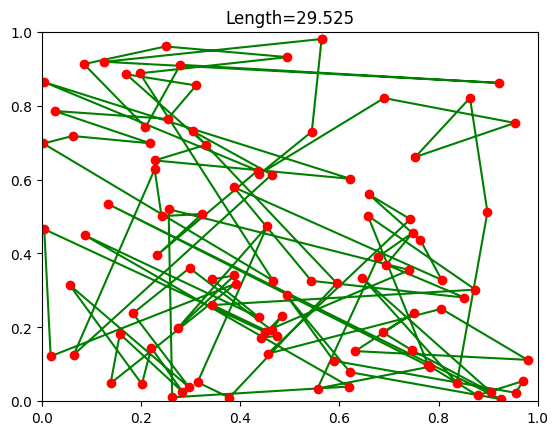

In [22]:
pop = evolve(pop, globaldist, 1/100, ngen=1000, trace=100)
draw(pop[0])

No llega a una solución suficientemente buena. Puede ser por varios motivos:
  * Pocas generaciones. Continuar a ver.
  * pmut incorrecta: demasiado baja: convergencia muy lenta; demasiado alta: mucha aleatoriedad, la optimización no pregresa debido al ruido.
  * T incorrecto: demasiado bajo, pocas opciones a los mejores; demasiado alto: se cae en minimo local.
  * El mejor individuo se pierde: probar elitismo.
  * Hemos caído en un mínimo local: volver a empezar (multiarranque).

In [23]:
# aumentamos generaciones

pop = evolve(pop, globaldist, 1/100, ngen=10000, trace=500)

29.5245 27.9946 29.8672 30.4355 31.1701 31.1471 31.5178 30.1683 31.3784 30.1600 30.9151 29.6590 31.7032 31.6557 31.3666 28.3935 32.1240 29.2869 30.1609 29.5371 
Fitness óptimo: 29.328
Mejor individuo [[0.5642696742735989, 0.9801384844337597], [0.2092202940037915, 0.7415775443241935], [0.4952329615559806, 0.9311775894780175], [0.43549418718677035, 0.6241289474799954], [0.31130918313591205, 0.8545457319320597], [0.24969404380600335, 0.9600467657522086], [0.1705364411799497, 0.8846808176103278], [0.25391391610860914, 0.7641244059389684], [0.3044774374252185, 0.7310313422019327], [0.22762328443470214, 0.627414210742153], [0.323433933838161, 0.5068337090138902], [0.6785236695642043, 0.39119477830554505], [0.0048939219846825255, 0.8635350555457212], [0.08511086492841424, 0.9123075505436051], [0.1978488658972426, 0.8872693649066419], [0.0031474687633804566, 0.6974574785842637], [0.025897479791937017, 0.7854526665590987], [0.2793138301174244, 0.9103956650199608], [0.25580657871099755, 0.519726

45.9347 19.0253 15.3818 14.0329 13.5622 13.0754 12.9146 12.8921 12.8887 12.8693 12.8006 12.7359 12.7359 12.7254 12.6142 12.5467 12.5467 12.4729 12.4729 12.4729 
Fitness óptimo: 12.473
Mejor individuo [[0.9065498976196814, 0.02381958527497441], [0.9794883193315694, 0.11207520940235804], [0.8744058793117488, 0.30207179832703746], [0.806151832654163, 0.3288366900529254], [0.8986352255038935, 0.5116579750591849], [0.46365765315595475, 0.6132297411379687], [0.4386079860370994, 0.6142798815693052], [0.33131673439274434, 0.693896434962478], [0.3044774374252185, 0.7310313422019327], [0.25391391610860914, 0.7641244059389684], [0.1978488658972426, 0.8872693649066419], [0.1705364411799497, 0.8846808176103278], [0.1263309724872509, 0.9185321014517236], [0.2092202940037915, 0.7415775443241935], [0.21886861543988367, 0.6980104036528004], [0.3884706603234591, 0.34043302784114093], [0.3913628378102181, 0.3185830750836698], [0.3434173147566393, 0.32992255868483356], [0.13373527735293878, 0.533685387689

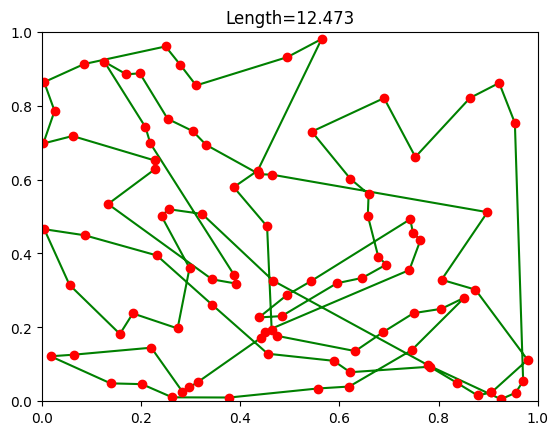

In [25]:
# la optimización se estanca, quizá es que T es demasiado bajo

pop = create(cities)
pop = evolve(pop, globaldist, 1/100, ngen=10000, trace=500, T=6)
draw(pop[0])

In [26]:
# hay otras estrategias de mutación mejores para este problema, por ejemplo borrar e insertar

def mutate (ind, pmut, L): # la mutación consistirá en borrar un elemento e insertarlo en otro lado
    pass

44.3677 13.2260 11.1177 10.3614 10.1418 10.0698 9.7853 9.7297 9.6155 9.3365 9.1446 8.9072 8.9072 8.9072 8.9072 8.9072 8.9072 8.9072 8.8407 8.8407 
Fitness óptimo: 8.841
Mejor individuo [[0.2092202940037915, 0.7415775443241935], [0.25391391610860914, 0.7641244059389684], [0.4952329615559806, 0.9311775894780175], [0.5642696742735989, 0.9801384844337597], [0.6901572276474558, 0.8203362566663311], [0.5445252142594251, 0.7295590645635646], [0.46365765315595475, 0.6132297411379687], [0.4386079860370994, 0.6142798815693052], [0.43549418718677035, 0.6241289474799954], [0.387141492676661, 0.5792852545912592], [0.323433933838161, 0.5068337090138902], [0.25580657871099755, 0.519726015381631], [0.2415634321550142, 0.500852093941769], [0.23212286400737547, 0.3945559700824013], [0.2980093518214506, 0.36041197123227897], [0.3441878827094532, 0.2604351258948506], [0.43806374889930155, 0.2268325586117821], [0.4423888847621813, 0.17212722421686055], [0.4556164527790729, 0.12863149772605698], [0.58861193

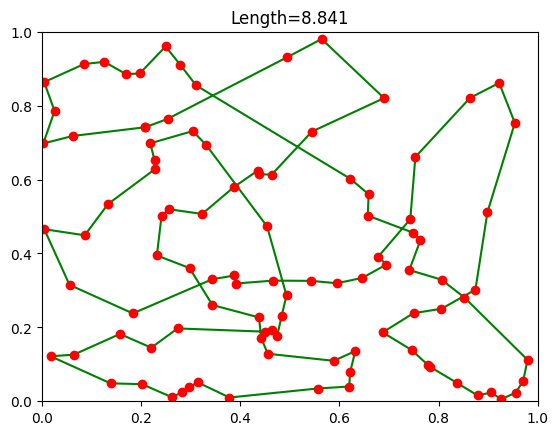

In [27]:
pop = create(cities)
pop = evolve(pop, globaldist, 1/100, ngen=10000, trace=500, T=6, pcross=0.0)
draw(pop[0])

In [ ]:
# continuamos, pero parece estancarse

pop = evolve(pop, globaldist, 1/100, ngen=10000, trace=500, T=4, pcross=0.0)

draw(pop[0])

In [51]:
import numpy as np
import random

# pero el azar siempre es nuestro aliado
# el uso de varios operadores de mutación ayuda a salir de mínimos locales

def mutate_swap (ind, pmut): # la mutación consistirá en intercambiar elementos
    if random.random() >= pmut:
        return  # NO mutation
    print('Swap!')
    idx1, idx2 = np.random.choice(range(len(ind)), size=2)
    ind[idx1], ind[idx2] = ind[idx2], ind[idx1]

def mutate_insert (ind, pmut): # la mutación consistirá en borrar un elemento e insertarlo en otro lado
    if random.random() >= pmut:
        print('No mutation')
        return  # NO mutation
    print('Insert!')
    idx1 = np.random.choice(range(len(ind)))
    gene = ind.pop(idx1)
    idx2 = np.random.choice(range(len(ind)))
    ind.insert(idx2, gene)

def mutate_reverse (ind, pmut): # selecciona dos puntos e invierte la secuencia entre ellos
    if random.random() >= pmut:
        return  # NO mutation
    print('Reverse!')
    idx1, idx2 = np.random.choice(range(len(ind)), size=2)
    if idx1 > idx2:
        idx1, idx2 = idx2, idx1
    ind[idx1+1:idx2] = ind[idx1+1:idx2][::-1]

mutations = [mutate_swap, mutate_insert, mutate_reverse]
def mutate (ind, pmut):
    operator = random.choice(mutations)
    return operator(ind, pmut)

In [50]:
ind = [4, 6, 3, 1, 7, 5, 0, 9, 8, 2]
mutate_reverse(ind, 0.5)
print(ind)

Reverse!
[4, 6, 3, 1, 7, 5, 2]


44.7037 17.3194 13.5316 11.4063 10.4770 10.1668 9.9605 9.8090 9.6074 8.7744 8.6973 8.3858 8.3361 8.3361 8.3361 8.3361 8.3361 8.3361 8.3361 8.3361 
Fitness óptimo: 8.336
Mejor individuo [[0.4556164527790729, 0.12863149772605698], [0.4423888847621813, 0.17212722421686055], [0.44920042912037383, 0.18835427573438068], [0.4636205151855679, 0.19249574424477278], [0.47467832142010535, 0.17692718986260936], [0.4837264739606879, 0.23045417711558214], [0.43806374889930155, 0.2268325586117821], [0.3913628378102181, 0.3185830750836698], [0.3884706603234591, 0.34043302784114093], [0.3434173147566393, 0.32992255868483356], [0.2980093518214506, 0.36041197123227897], [0.2415634321550142, 0.500852093941769], [0.25580657871099755, 0.519726015381631], [0.13373527735293878, 0.5336853876899833], [0.08674110453583683, 0.4491174987265194], [0.005128451667189338, 0.4655718085045638], [0.05603526365085032, 0.3149530712641142], [0.15763623266223903, 0.18210618406479095], [0.22090405091557253, 0.1450004013077387

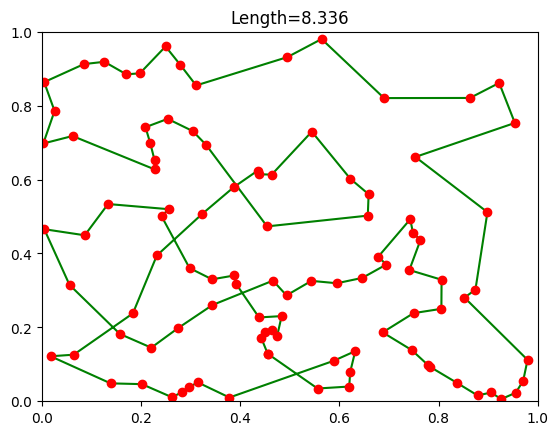

In [31]:
pop = create(cities)
pop = evolve(pop, globaldist, 1/100, ngen=10000, trace=500, T=4, pcross=0.0)
draw(pop[0])

8.3361 8.3361 8.2496 8.2496 8.2496 8.2496 8.2496 8.2496 8.2496 8.2496 8.1808 8.1808 8.1028 8.1028 8.0464 7.9831 7.9831 7.9516 7.9510 7.9510 
Fitness óptimo: 7.951
Mejor individuo [[0.4423888847621813, 0.17212722421686055], [0.47467832142010535, 0.17692718986260936], [0.4636205151855679, 0.19249574424477278], [0.44920042912037383, 0.18835427573438068], [0.43806374889930155, 0.2268325586117821], [0.4837264739606879, 0.23045417711558214], [0.49352498279326595, 0.28652416807644077], [0.4662474858565825, 0.32647667516764145], [0.5437394088109648, 0.3258031129949792], [0.5950780852425872, 0.3193476592023645], [0.646401605512568, 0.3338636388089157], [0.6946411585627993, 0.36991609629423117], [0.6785236695642043, 0.39119477830554505], [0.7430581106897977, 0.49260737229959284], [0.7483358474304422, 0.4563419482458657], [0.7634962513234275, 0.4358457309207533], [0.7411632641820634, 0.35513151640087337], [0.806151832654163, 0.3288366900529254], [0.8057632881682811, 0.250168118157608], [0.7496156

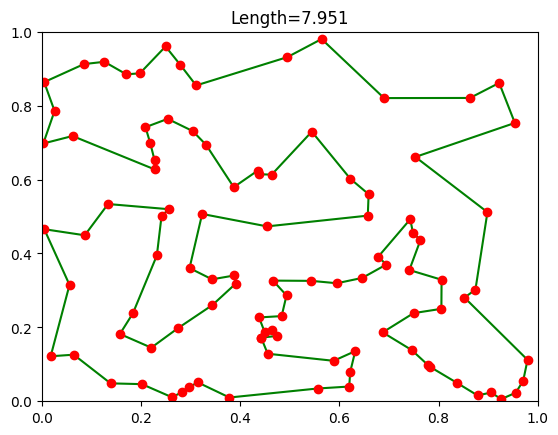

In [32]:
# parece que ahora vamos por buen camino; continuamos un poco más

pop = evolve(pop, globaldist, 1/100, ngen=10000, trace=500, T=4, pcross=0.0)
draw(pop[0])

### Optimización de números reales

In [ ]:
# Función himmelblau
# si se pone onlyone a True 

onlyone = False
def himmelblau (ch):
	x = ch[0]
	y = ch[1]
	fxy = (x**2 + y - 11)**2 + (x + y**2 -7)**2
	if onlyone and (x>0 or y>0): # himmelblau modified to have only one global minimum (-3.77, -3.28)
		fxy += 0.5
	return fxy

In [ ]:
# Define operadores de números reales

rang = (-5, 5) # al no hacerlo con clases, debemos definir el rango como variable global

def create (alphabet=None, N=100): # crea y devuelve población; alphabet aquí no se usa
    pass

def crossover (ind1, ind2, pcross): # devuelve el cruce (emparejamiento) de dos individuos
    pass

def mutate (ind, pmut): # devuelve individuo mutado; la mutación consistirá en intercambiar elementos
    pass

In [ ]:
# fitness para himmelblau: valor mínimo de la función

def fitness_himmel (ch):
	return 1 / (1 + himmelblau(ch))

In [ ]:
# crea y evoluiona
pop = create()
pop = evolve(pop, fitness_himmel, 1/100, ngen=1000, trace=100, T=4, pcross=0.7)
print(pop(0))

### Otras sugenrencias opcionales
  * *Ampliar el TSP a 3 dimensiones*, incluyendo el dibujo con matplotlib.
  * *Cuadrado mágico de 8x8*: deben sumar lo mismo filas, columnas y diagonales principales.
  * *n-reinas*: colocar n reinas en un tablero de modo que ninguna se coma a otra.
  * *mochila*: llenar una mochila con objetos de una tabla de modo que se maximice la supervivencia y no se exceda la capacidad.
  * *Probar con otras funciones numéricas con convexas* (ver la celda siguiente).

Ejemplo de cuadrado mágico de 8x8:

[[63 54 14 44 13 57  7  8]  
 [20  2 45  9 17 64 51 52]  
 [38 47 21 62 27 29  4 32]  
 [18 36 33 40 28 23 34 48]  
 [39  3 50  5 42 24 56 41]  
 [12 26 43 30 53 16 22 58]  
 [11 37 35 60 49  1 61  6]  
 [59 55 19 10 31 46 25 15]]  

In [ ]:
# otras funciones

import math
def ackley (ch): # min in (0,0); huge set of local minima
	x = ch[0]
	y = ch[1]
	fxy = -20 * math.exp( -0.2 * (0.5 * (x**2 + y**2)) ** 0.5 ) \
		- math.exp (0.5 * (math.cos(2 * math.pi * x) + math.cos(2 * math.pi * y))) + math.e + 20
	return fxy

def beale (ch):
	x = ch[0]
	y = ch[1]
	term1 = (1.5 - x + x * y) ** 2
	term2 = (2.25 - x + x * y ** 2) ** 2
	term3 = (2.625 - x + x * y ** 3) ** 2
	return term1 + term2 + term3

def easom (ch):
	x = ch[0]
	y = ch[1]
	return -math.cos(x) * math.cos(y) * math.exp(-(x - math.pi)**2 - (y - math.pi)**2)

def goldstein_price_function(ch):
	x = ch[0]
	y = ch[1]
	term1 = (1 + (x + y + 1) ** 2 * (19 - 14 * x + 3 * x ** 2 - 14 * y + 6 * x * y + 3 * y ** 2))
	term2 = (30 + (2 * x - 3 * y) ** 2 * (18 - 32 * x + 12 * x ** 2 + 48 * y - 36 * x * y + 27 * y ** 2))
	return term1 * term2

def rosenbrock (ch):
	x = ch[0]
	y = ch[1]
	a = 1
	b = 100
	term1 = (a - x) ** 2
	term2 = b * (y - x ** 2) ** 2
	return term1 + term2

def rosenbrock_ndim (x):
    a = 1
    b = 100
    sum = 0
    for i in range(len(x)-1):
        sum += (a - x[i])**2 + b * (x[i+1] - x[i]**2)**2
    return sum


### Otros ejemplos

  * Canal del profesor en https://www.youtube.com/@franciscoserradilla5932
  * Viajante de comercio en 3D: https://youtu.be/M-Wvq6LS_Ko?si=a9AkrZ0ipgoYr8x6
  * Lunar lander con Neuroevolución: https://youtu.be/nIS9yeiqDEA?si=uvUJr_aY4KUyKdqx
  